In [1]:
from rapidz import Stream
from shed.simple import SimpleFromEventStream, SimpleToEventStream, AlignEventStreams

from bluesky import RunEngine
from ophyd.sim import hw
hw = hw()
import operator as op
RE = RunEngine()
import bluesky.plans as bp
from pprint import pprint

In [2]:
source = Stream()

# pull data out of the start document
my_number = SimpleFromEventStream('start', 'my_number', upstream=source)
# pull data out of the events
data = SimpleFromEventStream('event', ('data', 'motor1'), upstream=source, principle=True)

# starmap is the same as map(lambda x: f(*x))
output = data.combine_latest(my_number, emit_on=0).starmap(op.add)
o_sink = output.sink(print)

In [3]:
token = RE.subscribe(lambda *x: source.emit(x))
RE(bp.scan([hw.motor1], hw.motor1, 0, 10, 11, md={'my_number': 5}))
RE.unsubscribe(token)

5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0


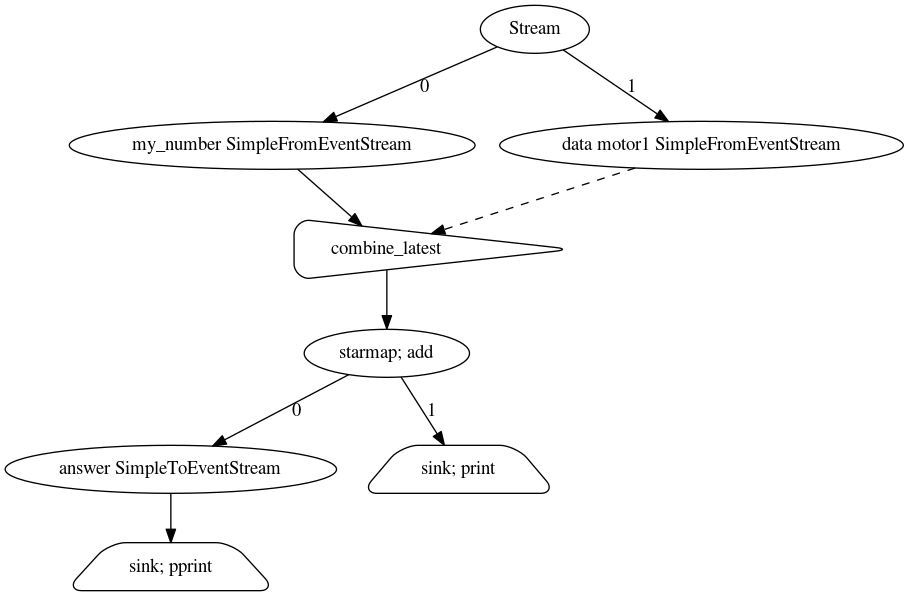

In [4]:
finish = SimpleToEventStream(output, 'answer')
f_sink = finish.sink(pprint)
finish.visualize()

In [5]:
# We don't need exsessive printing
o_sink.destroy()

token = RE.subscribe(lambda *x: source.emit(x))
RE(bp.scan([hw.motor1], hw.motor1, 0, 10, 11, md={'my_number': 5}))
RE.unsubscribe(token)

('start',
 {'parent_node_map': {'0adfbeb3-3d4b-4015-8161-970cce24eb76': 'f9159c89-ac2e-44e3-8f85-056aa7120db2',
                      '1833a63f-1698-487c-aaa2-51ec98dc71be': 'f9159c89-ac2e-44e3-8f85-056aa7120db2'},
  'parent_uids': ['f9159c89-ac2e-44e3-8f85-056aa7120db2'],
  'scan_id': 1,
  'time': 1553527535.2091367,
  'uid': 'd3664ca9-54be-4cc8-ab9f-7378956426a8'})
('descriptor',
 {'configuration': {},
  'data_keys': {'answer': {'dtype': 'number',
                           'shape': (),
                           'source': 'analysis'}},
  'hints': {'analyzer': {'fields': ['answer']}},
  'name': 'primary',
  'object_keys': {'answer': ['answer']},
  'run_start': 'd3664ca9-54be-4cc8-ab9f-7378956426a8',
  'time': 1553527535.2696393,
  'uid': 'a93fb6a4-2714-4636-9979-6ff9f73f4080'})
('event',
 {'data': {'answer': 5.0},
  'descriptor': 'a93fb6a4-2714-4636-9979-6ff9f73f4080',
  'filled': {'answer': True},
  'seq_num': 1,
  'time': 1553527535.3370023,
  'timestamps': {'answer': 1553527535.33

In [6]:
combined_data = source.AlignEventStreams(finish)
c_sink = combined_data.sink(pprint)

In [7]:
f_sink.destroy()
token = RE.subscribe(lambda *x: source.emit(x))
RE(bp.scan([hw.motor1], hw.motor1, 0, 10, 11, md={'my_number': 5}))
RE.unsubscribe(token)

('start',
 {'detectors': ['motor1'],
  'hints': {'dimensions': [(['motor1'], 'primary')]},
  'motors': ('motor1',),
  'my_number': 5,
  'num_intervals': 10,
  'num_points': 11,
  'original_start_uid': '5abe6d2e-c547-4430-a64a-25612b90adf2',
  'original_time': 1553527834.9112206,
  'parent_node_map': {'0adfbeb3-3d4b-4015-8161-970cce24eb76': '5abe6d2e-c547-4430-a64a-25612b90adf2',
                      '1833a63f-1698-487c-aaa2-51ec98dc71be': '5abe6d2e-c547-4430-a64a-25612b90adf2'},
  'parent_uids': ['5abe6d2e-c547-4430-a64a-25612b90adf2'],
  'plan_args': {'args': ["SynAxis(prefix='', name='motor1', "
                         "read_attrs=['readback', 'setpoint'], "
                         "configuration_attrs=['velocity', 'acceleration'])",
                         0,
                         10],
                'detectors': ["SynAxis(prefix='', name='motor1', "
                              "read_attrs=['readback', 'setpoint'], "
                              "configuration_attrs=['vel

  'uid': '8f209e8e-a953-418f-b63e-d97bdb9391df'})
('stop',
 {'exit_status': 'success',
  'num_events': {'primary': 11},
  'reason': '',
  'run_start': 'e69c4fa3-7a43-495a-a923-7c682718f111',
  'time': 1553527836.9298468,
  'uid': '5bc262bd-6f1a-4035-aa89-1a247cea7919'})


In [8]:
from xpdan.vend.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()
combined_data.starsink(bec)

Output()

Transient Scan ID: 3     Time: 2019/03/25 11:31:22
Persistent Unique Scan ID: 'a1e311c1-0fa2-469b-aced-425432e38fdd'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |     motor1 |     answer |
+-----------+------------+------------+------------+


/home/christopher/mc/envs/dp_dev/lib/python3.6/site-packages/matplotlib/legend.py:1196: MatplotlibDeprecationWarning: 
Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.
  message="Legend.draggable() is drepecated in "


|         1 | 11:31:23.2 |      0.000 |      5.000 |
|         2 | 11:31:23.3 |      1.000 |      6.000 |
|         3 | 11:31:23.4 |      2.000 |      7.000 |
|         4 | 11:31:23.5 |      3.000 |      8.000 |
|         5 | 11:31:23.5 |      4.000 |      9.000 |
|         6 | 11:31:23.6 |      5.000 |     10.000 |
|         7 | 11:31:23.7 |      6.000 |     11.000 |
|         8 | 11:31:23.8 |      7.000 |     12.000 |
|         9 | 11:31:23.9 |      8.000 |     13.000 |
|        10 | 11:31:24.0 |      9.000 |     14.000 |
|        11 | 11:31:24.1 |     10.000 |     15.000 |
+-----------+------------+------------+------------+
generator scan ['a1e311c1'] (scan num: 3)





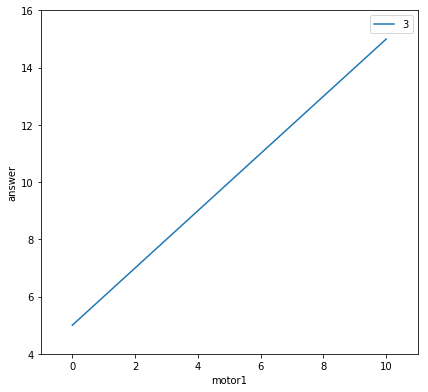

In [9]:
c_sink.destroy()
token = RE.subscribe(lambda *x: source.emit(x))
RE(bp.scan([hw.motor1], hw.motor1, 0, 10, 11, md={'my_number': 5}))
RE.unsubscribe(token)

Transient Scan ID: 4     Time: 2019/03/22 13:49:59
Persistent Unique Scan ID: '48f9b8d4-3666-4458-af13-c75007760bc3'
New stream: 'primary'
+-----------+------------+------------+------------+------------+
|   seq_num |       time |     motor1 |     motor2 |     answer |
+-----------+------------+------------+------------+------------+


/home/christopher/mc/envs/dp_dev/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


|         1 | 13:49:59.8 |      0.000 |      0.000 |      5.000 |
|         2 | 13:49:59.8 |      0.000 |      1.000 |      5.000 |
|         3 | 13:49:59.8 |      0.000 |      2.000 |      5.000 |
|         4 | 13:49:59.8 |      0.000 |      3.000 |      5.000 |
|         5 | 13:49:59.8 |      0.000 |      4.000 |      5.000 |
|         6 | 13:49:59.8 |      0.000 |      5.000 |      5.000 |
|         7 | 13:49:59.9 |      0.000 |      6.000 |      5.000 |
|         8 | 13:49:59.9 |      0.000 |      7.000 |      5.000 |
|         9 | 13:49:59.9 |      0.000 |      8.000 |      5.000 |
|        10 | 13:49:59.9 |      0.000 |      9.000 |      5.000 |
|        11 | 13:49:59.9 |      0.000 |     10.000 |      5.000 |
|        12 | 13:50:00.0 |      1.000 |     10.000 |      6.000 |
|        13 | 13:50:00.0 |      1.000 |      9.000 |      6.000 |
|        14 | 13:50:00.0 |      1.000 |      8.000 |      6.000 |
|        15 | 13:50:00.0 |      1.000 |      7.000 |      6.000 |
|        1

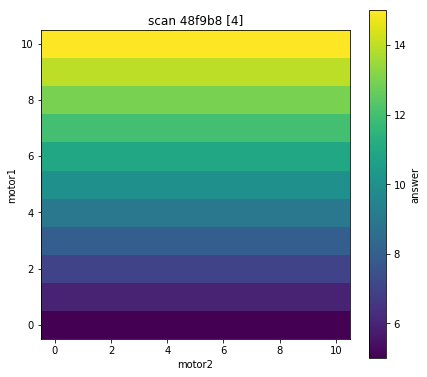

In [10]:
token = RE.subscribe(lambda *x: source.emit(x))
RE(bp.grid_scan([hw.motor1], hw.motor1, 0, 10, 11, hw.motor2, 0, 10, 11, True, md={'my_number': 5}))
RE.unsubscribe(token)

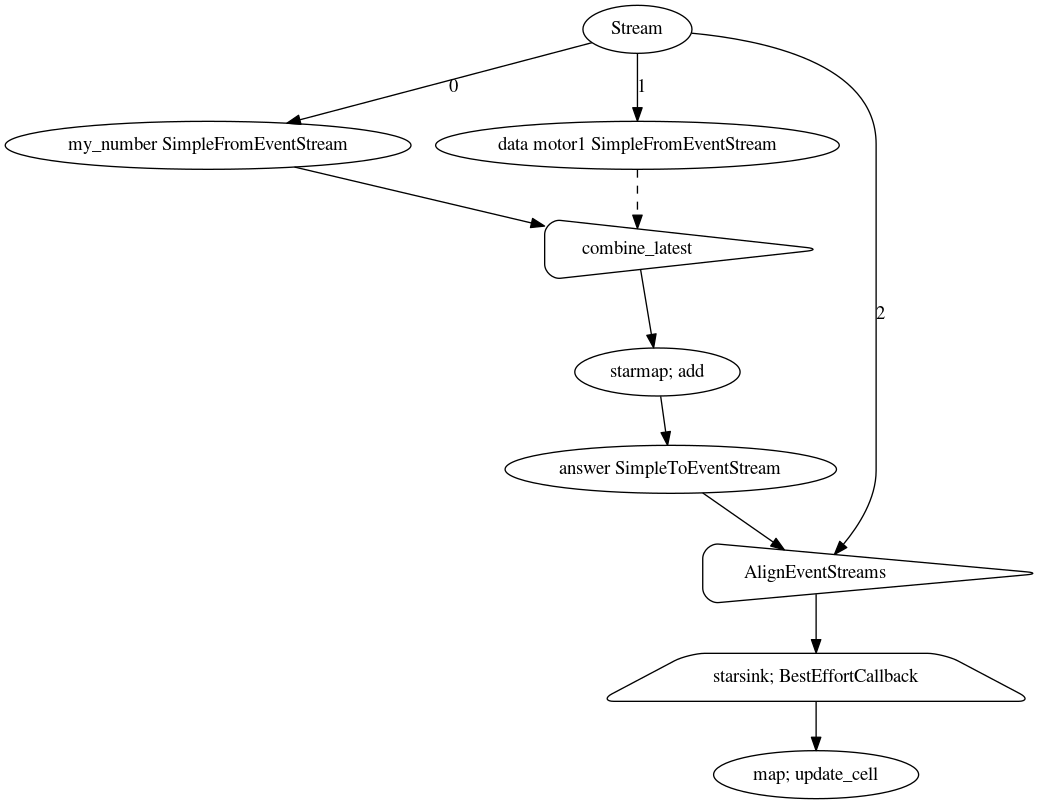

In [10]:
finish.visualize()